In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [19]:
# Load Boston Housing dataset
df = pd.read_csv(
    "data/housing.csv",
    delim_whitespace=True,
    names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
)

print(df.head())

print(df.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_14385/1291547766.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [20]:
# Define the feature(independent variable) and predict(dependent variable)
X = df[['RM']] # Number of rooms
y = df['PRICE'] # House prices

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 102


In [21]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Print the intercept and cofficient
print(f"Intercept: {model.intercept_}")
print(f"Cofficient: {model.coef_}")

Intercept: -36.24631889813795
Cofficient: [9.34830141]


In [23]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame(
    {
        'Actual': y_test,
        'Predicted': y_pred
    }
)

print(predictions.head())

     Actual  Predicted
173    23.6  23.732383
274    32.4  26.929502
491    13.6  19.684568
72     22.8  20.451129
452    16.1  22.619935


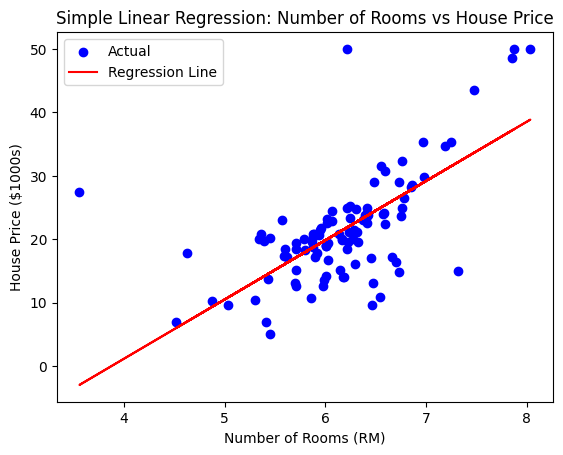

In [24]:
# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Price ($1000s)')
plt.title('Simple Linear Regression: Number of Rooms vs House Price')
plt.legend()
plt.show()

In [25]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 46.144775347317264
R-squared score: 0.3707569232254778
